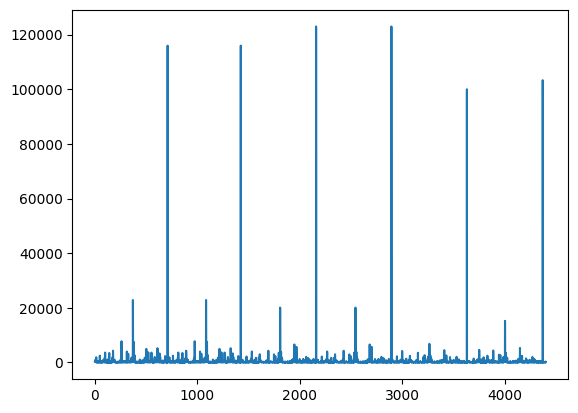

In [ ]:
B# load and plot the time series dataset
from pandas import read_csv
from matplotlib import pyplot
# load dataset
series = read_csv('Forecast_Data1.csv', header=0, index_col=0)
values = series.values
# plot dataset
pyplot.plot(values)
pyplot.show()

>expected=182.0, predicted=187.6
>expected=187.0, predicted=209.9
>expected=286.0, predicted=288.2
>expected=145.0, predicted=146.6
>expected=138.0, predicted=144.5
>expected=637.0, predicted=627.3
>expected=315.0, predicted=339.5
>expected=60.0, predicted=65.9
>expected=79.0, predicted=85.1
>expected=12.0, predicted=14.4
>expected=0.0, predicted=0.6
>expected=913.0, predicted=1006.5
MAE: 15.120


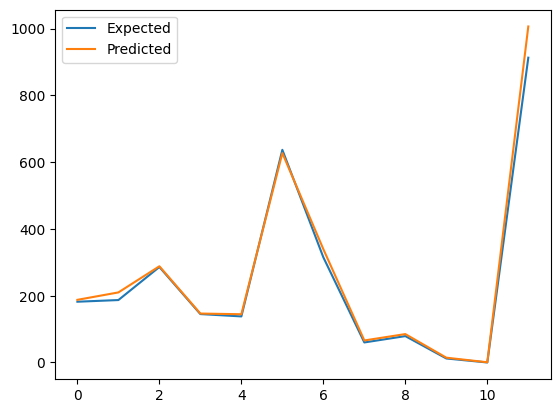

In [6]:
# forecast monthly births with random forest
from numpy import asarray
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot

# transform a time series dataset into a supervised learning dataset
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols = list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
	# put it all together
	agg = concat(cols, axis=1)
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg.values

# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
	return data[:-n_test, :], data[-n_test:, :]

# fit an random forest model and make a one step prediction
def random_forest_forecast(train, testX):
	# transform list into array
	train = asarray(train)
	# split into input and output columns
	trainX, trainy = train[:, :-1], train[:, -1]
	# fit model
	model = RandomForestRegressor(n_estimators=1000)
	model.fit(trainX, trainy)
	# make a one-step prediction
	yhat = model.predict([testX])
	return yhat[0]

# walk-forward validation for univariate data
def walk_forward_validation(data, n_test):
	predictions = list()
	# split dataset
	train, test = train_test_split(data, n_test)
	# seed history with training dataset
	history = [x for x in train]
	# step over each time-step in the test set
	for i in range(len(test)):
		# split test row into input and output columns
		testX, testy = test[i, :-1], test[i, -1]
		# fit model on history and make a prediction
		yhat = random_forest_forecast(history, testX)
		# store forecast in list of predictions
		predictions.append(yhat)
		# add actual observation to history for the next loop
		history.append(test[i])
		# summarize progress
		print('>expected=%.1f, predicted=%.1f' % (testy, yhat))
	# estimate prediction error
	error = mean_absolute_error(test[:, -1], predictions)
	return error, test[:, -1], predictions

# load the dataset
series = read_csv('Forecast_Data1.csv', header=0, index_col=0)
values = series.values
# transform the time series data into supervised learning
data = series_to_supervised(values, n_in=6)
# evaluate
mae, y, yhat = walk_forward_validation(data, 12)
print('MAE: %.3f' % mae)
# plot expected vs predicted
pyplot.plot(y, label='Expected')
pyplot.plot(yhat, label='Predicted')
pyplot.legend()
pyplot.show()

In [4]:
# finalize model and make a prediction for monthly births with random forest
from numpy import asarray
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.ensemble import RandomForestRegressor

# transform a time series dataset into a supervised learning dataset
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols = list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
	# put it all together
	agg = concat(cols, axis=1)
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg.values

# load the dataset
series = read_csv('Forecast_Data1.csv', header=0, index_col=0)
values = series.values
# transform the time series data into supervised learning
train = series_to_supervised(values, n_in=6)
# split into input and output columns
trainX, trainy = train[:, :-1], train[:, -1]
# fit model
model = RandomForestRegressor(n_estimators=1000)
model.fit(trainX, trainy)
# construct an input for a new prediction
row = values[-6:].flatten()
# make a one-step prediction
yhat = model.predict(asarray([row]))
print('Input: %s, Predicted: %.3f' % (row, yhat[0]))

KeyboardInterrupt: 

In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 11.2 MB/s eta 0:00:00


In [ ]:
# Import the library
from pmdarima import auto_arima

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

# Fit auto_arima function to AirPassengers dataset
stepwise_fit = auto_arima(data['Theft'], start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 12,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',   # we don't want to know if an order does not work
                          suppress_warnings = True,  # we don't want convergence warnings
                          stepwise = True)           # set to stepwise

# To print the summary
stepwise_fit.summary()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('Forecast__Data2.csv')

# Assuming your CSV has a column named 'date' and another named 'value'
# You may need to adjust this depending on your CSV structure
data['Year'] = pd.to_datetime(data['Year'])
data.set_index('Year', inplace=True)

# Split the data into train and test sets
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

# Fit ARIMA model
model = ARIMA(train, order=(5,1,0))
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=len(test))[0]

# Plot actual vs. forecasted values
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, forecast, label='Forecast', color='red')
plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ValueError: SARIMAX models require univariate `endog`. Got shape (3521, 13).

In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('Forecast__Data2.csv')

# Split the data into train and test sets for each variable
train_size = int(len(data) * 0.8)
train1, test1 = data['Year'][:train_size], data['Year'][train_size:]
train2, test2 = data['Theft'][:train_size], data['Theft'][train_size:]

# Fit ARIMA models for each variable
model1 = ARIMA(train1, order=(5,1,0))
model_fit1 = model1.fit()
model2 = ARIMA(train2, order=(5,1,0))
model_fit2 = model2.fit()

# Forecast for each variable
forecast1 = model_fit1.forecast(steps=len(test1))
forecast2 = model_fit2.forecast(steps=len(test2))

# Plot actual vs. forecasted values for each variable
plt.figure(figsize=(14, 7))

plt.subplot(2, 1, 1)
plt.plot(train1.index, train1, label='Train (value1)')
plt.plot(test1.index, test1, label='Test (value1)')
plt.plot(test1.index, forecast1, label='Forecast (value1)', color='red')
plt.title('ARIMA Forecast for value1')
plt.xlabel('Theft')
plt.ylabel('Date')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(train2.index, train2, label='Train (value2)')
plt.plot(test2.index, test2, label='Test (value2)')
plt.plot(test2.index, forecast2, label='Forecast (value2)', color='red')
plt.title('ARIMA Forecast for value2')
plt.ylabel('Value2')
plt.legend()

plt.tight_layout()
plt.show()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

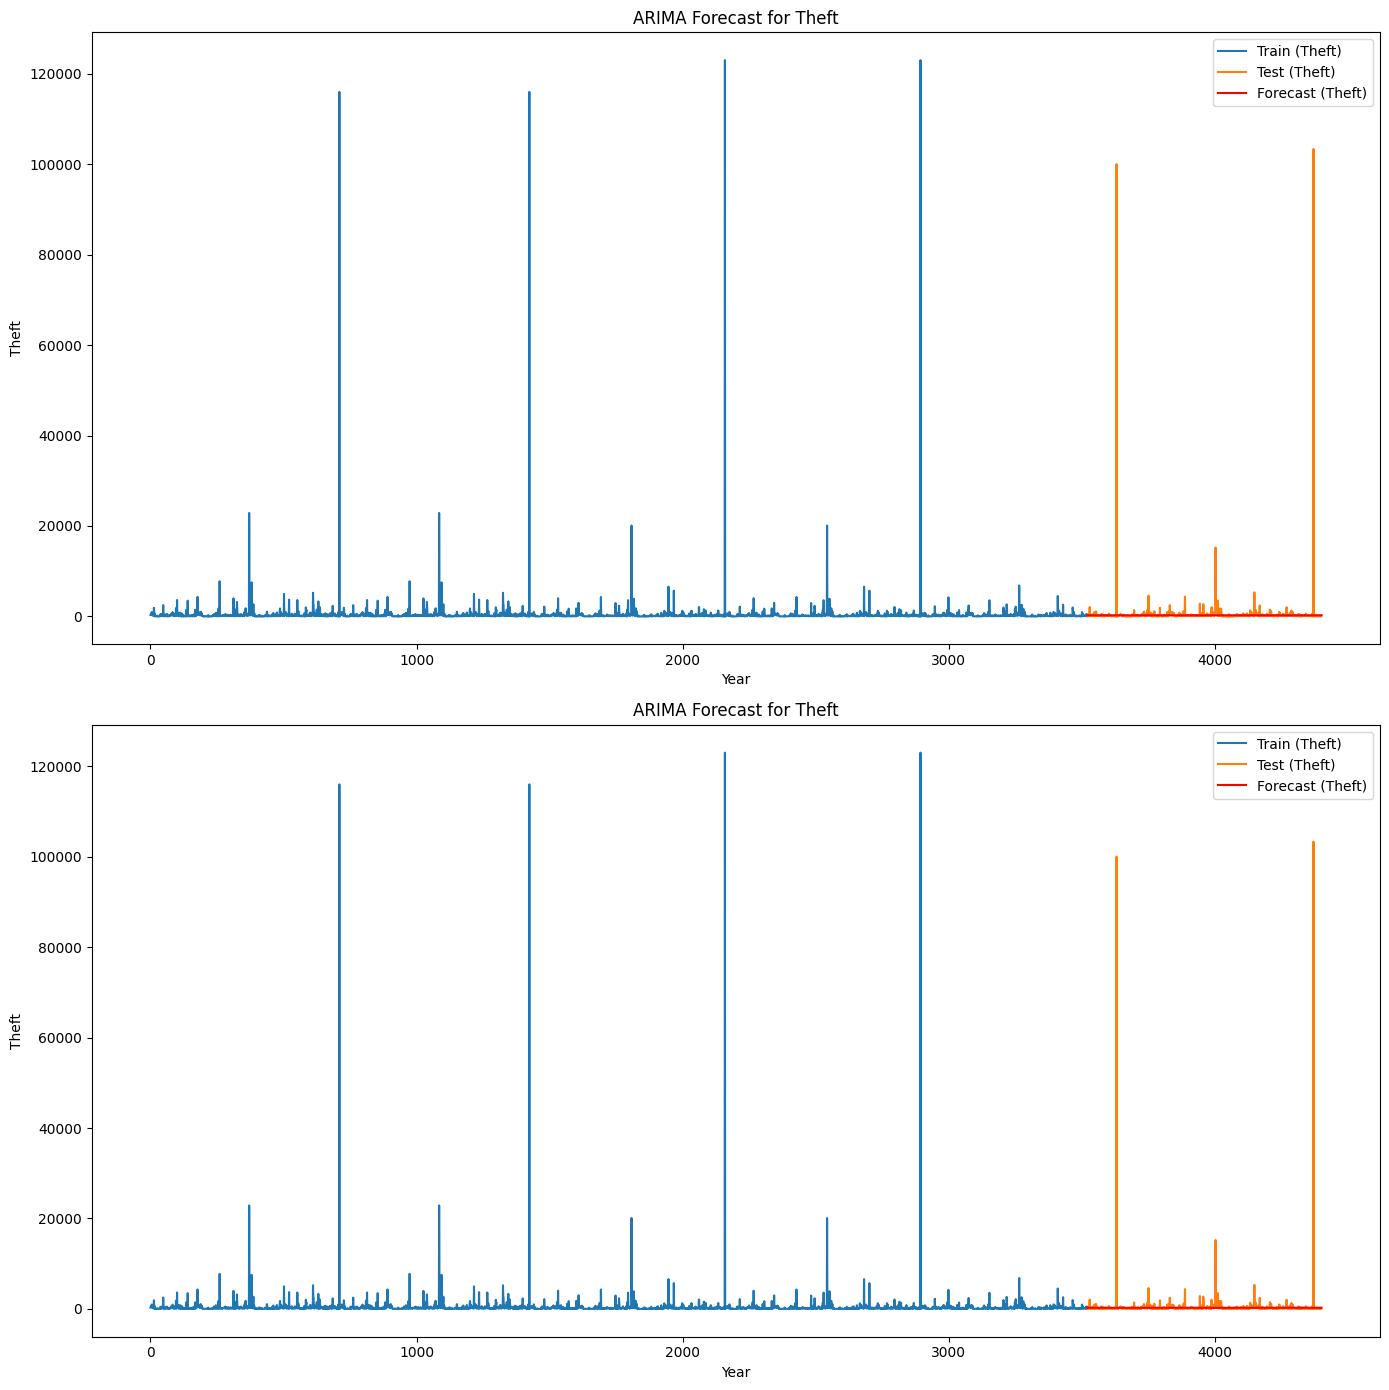

In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('Forecast__Data2.csv')

# Assuming your CSV has columns named 'Year', 'Theft', and 'Robbery'
# Adjust this depending on your CSV structure
'''data['Year'] = pd.to_datetime(data['Year'])
data.set_index('Year', inplace=True)'''

# Split the data into train and test sets for each variable
train_size = int(len(data) * 0.8)
train1, test1 = data['Theft'][:train_size], data['Theft'][train_size:]

# Fit ARIMA models for each variable
model1 = ARIMA(train1, order=(5,1,0))
model_fit1 = model1.fit()
model2 = ARIMA(train2, order=(5,1,0))
model_fit2 = model2.fit()

# Forecast for each variable
forecast1 = model_fit1.forecast(steps=len(test1))
forecast2 = model_fit2.forecast(steps=len(test2))

# Plot actual vs. forecasted values for each variable
plt.figure(figsize=(14, 14))

plt.subplot(2, 1, 1)
plt.plot(train1.index, train1, label='Train (Theft)')
plt.plot(test1.index, test1, label='Test (Theft)')
plt.plot(test1.index, forecast1, label='Forecast (Theft)', color='red')
plt.title('ARIMA Forecast for Theft')
plt.xlabel('Year')
plt.ylabel('Theft')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(train2.index, train2, label='Train (Theft)')
plt.plot(test2.index, test2, label='Test (Theft)')
plt.plot(test2.index, forecast2, label='Forecast (Theft)', color='red')
plt.title('ARIMA Forecast for Theft')
plt.xlabel('Year')
plt.ylabel('Theft')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df=pd.read_csv('Forecast__Data2.csv')
df.head()

,Year,Causing Death by Negligence,Hurt,Assault on Women with Intent to Outrage her Modesty,Kidnapping and Abduction,Rioting,Offences promoting enmity between different groups,Theft,Burglery,Dacoity,Counter feiting,Forgery Cheating and Fraud,Rash Driving on Public Way,Target
0,2017-01-01,211,174,52,10,4,3,303,183,3,2,65,967,1977
1,2017-01-02,194,72,21,2,3,1,274,71,4,1,27,162,832
2,2017-01-03,180,208,62,4,2,1,347,156,0,1,47,3398,4406
3,2017-01-04,246,86,63,5,0,3,640,248,1,1,55,1197,2545
4,2017-01-05,1,2,0,0,0,0,445,0,0,1,0,0,449


In [ ]:
# Updating the header
df.columns=["Year","Causing Death by Negligence", "Hurt",
        "Assault on Women with Intent to Outrage her Modesty", "Kidnapping and Abduction",  "Rioting",
          "Offences promoting enmity between different groups", "Theft", "Burglery", "Dacoity",
          "Counter feiting", "Forgery Cheating and Fraud", "Rash Driving on Public Way", "Target"]
df.head()

,Year,Causing Death by Negligence,Hurt,Assault on Women with Intent to Outrage her Modesty,Kidnapping and Abduction,Rioting,Offences promoting enmity between different groups,Theft,Burglery,Dacoity,Counter feiting,Forgery Cheating and Fraud,Rash Driving on Public Way,Target
0,2017-01-01,211,174,52,10,4,3,303,183,3,2,65,967,1977
1,2017-01-02,194,72,21,2,3,1,274,71,4,1,27,162,832
2,2017-01-03,180,208,62,4,2,1,347,156,0,1,47,3398,4406
3,2017-01-04,246,86,63,5,0,3,640,248,1,1,55,1197,2545
4,2017-01-05,1,2,0,0,0,0,445,0,0,1,0,0,449


<Axes: xlabel='Year'>

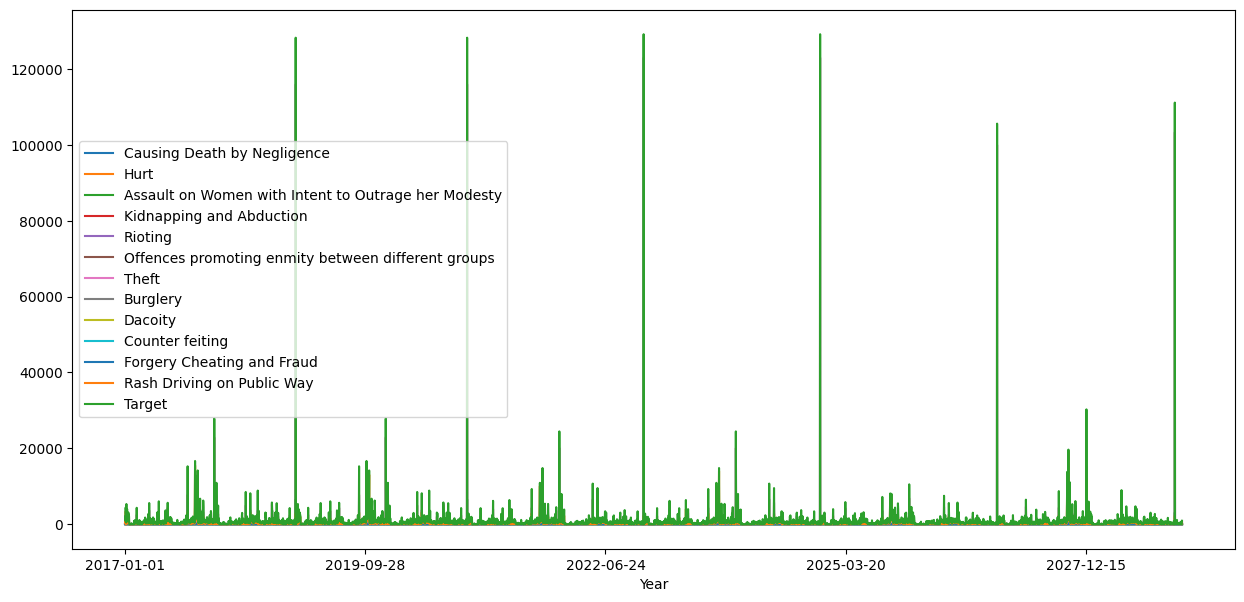

In [ ]:
df.describe()
df.set_index('Year',inplace=True)

from pylab import rcParams
rcParams['figure.figsize'] = 15, 7
df.plot()

In [ ]:
import pandas as pd

# Load your dataset
data = pd.read_csv('Forecast_Data1.csv')

# Assume the dataset has columns 'date', 'column1', and 'column2'
data['date'] = pd.to_datetime(data['Year'])
data.set_index('date', inplace=True)

Year     0
Theft    0
dtype: int64


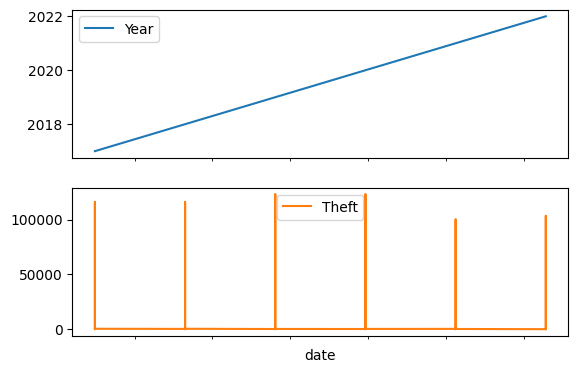

In [ ]:
# Check for missing values
print(data.isnull().sum())

# Fill missing values if any
data.fillna(method='ffill', inplace=True)

# Visualize the data (optional)
import matplotlib.pyplot as plt

data.plot(subplots=True)
plt.show()

In [ ]:
train_size = int(len(data) * 0.8)
train, test = data.iloc[:train_size], data.iloc[train_size:]

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Define a function to fit an ARIMA model
def fit_arima_model(train, order):
    model = ARIMA(train, order=order)
    model_fit = model.fit()
    return model_fit

# Example ARIMA order (p,d,q)
order = (1, 1, 1)

# Fit ARIMA models for both columns
model1 = fit_arima_model(train['Year'], order)
model2 = fit_arima_model(train['Theft'], order)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
<ipython-input-7-0de548b71f1f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['forecast1'] = forecast1
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results wi

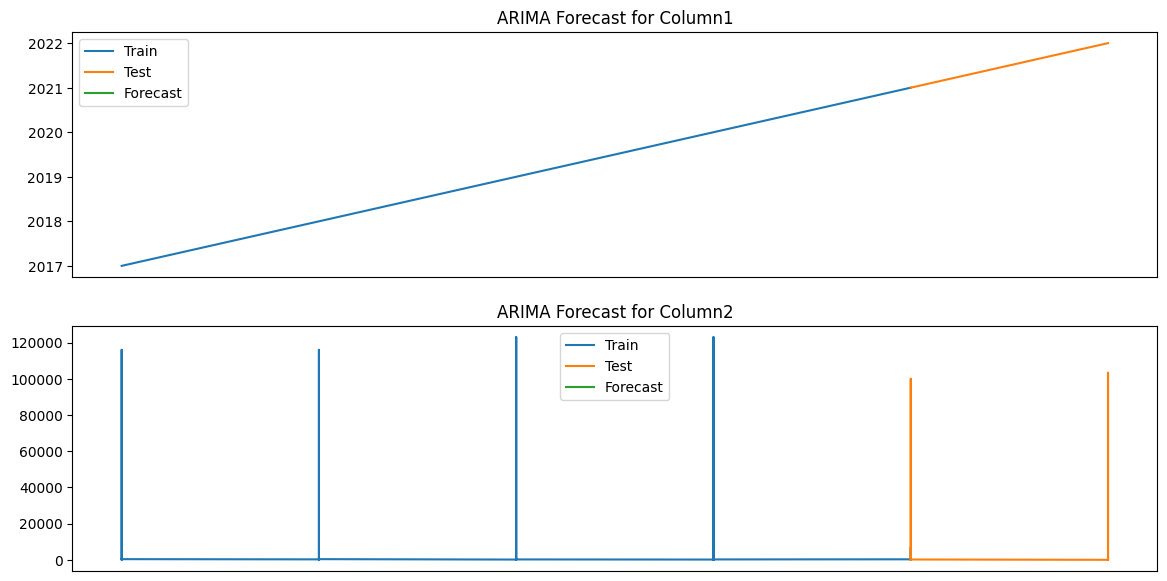

In [ ]:
# Forecast for 'column1'
forecast1 = model1.forecast(steps=len(test))
test['forecast1'] = forecast1

# Forecast for 'column2'
forecast2 = model2.forecast(steps=len(test))
test['forecast2'] = forecast2

# Plot the forecasts against actual values
plt.figure(figsize=(14, 7))

# Plot for column1
plt.subplot(2, 1, 1)
plt.plot(train['Year'], label='Train')
plt.plot(test['Year'], label='Test')
plt.plot(test['forecast1'], label='Forecast')
plt.title('ARIMA Forecast for Column1')
plt.legend()

# Plot for column2
plt.subplot(2, 1, 2)
plt.plot(train['Theft'], label='Train')
plt.plot(test['Theft'], label='Test')
plt.plot(test['forecast2'], label='Forecast')
plt.title('ARIMA Forecast for Column2')
plt.legend()

plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df=pd.read_csv('Forecast_Data1.csv', index_col = 'Year', parse_dates = True)
df.dropna()
print('Shape of Data', df.shape)
df.head()

Shape of Data (4402, 13)


,Causing Death by Negligence,Hurt,Assault on Women with Intent to Outrage her Modesty,Kidnapping and Abduction,Rioting,Offences promoting enmity between different groups,Theft,Burglery,Dacoity,Counter feiting,Forgery Cheating and Fraud,Rash Driving on Public Way,Target
Year,,,,,,,,,,,,,
2017-01-01,211,174,52,10,4,3,303,183,3,2,65,967,1977
2017-01-01,194,72,21,2,3,1,274,71,4,1,27,162,832
2017-01-01,180,208,62,4,2,1,347,156,0,1,47,3398,4406
2017-01-01,246,86,63,5,0,3,640,248,1,1,55,1197,2545
2017-01-01,1,2,0,0,0,0,445,0,0,1,0,0,449


<Axes: xlabel='Year'>

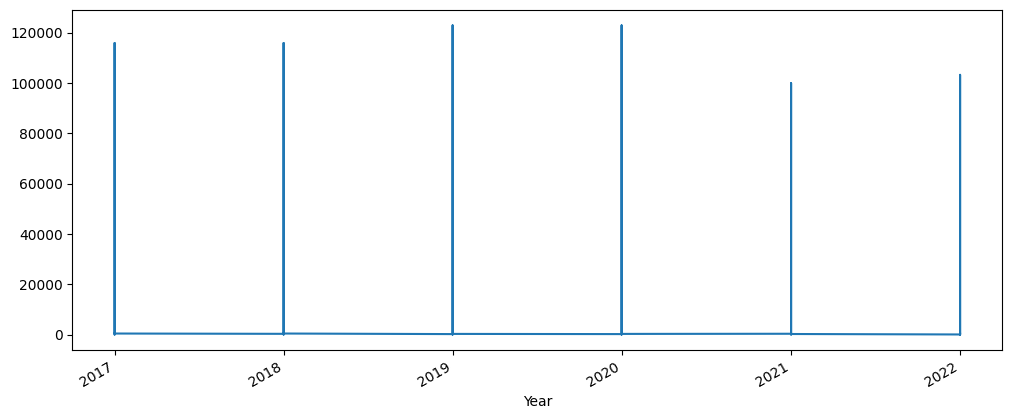

In [ ]:
df['Theft'].plot(kind='line', figsize=(12,5))

In [ ]:
pip install pandas numpy statsmodels

In [ ]:
import pandas as pd

# Sample data
data = {
    'Year': [2017, 2018, 2019, 2020, 2021, 2022],
    'Theft_Count': [391535, 308163, 333622, 242796, 287631, 319167]
}

df = pd.DataFrame(data)
df.set_index('Year', inplace=True)

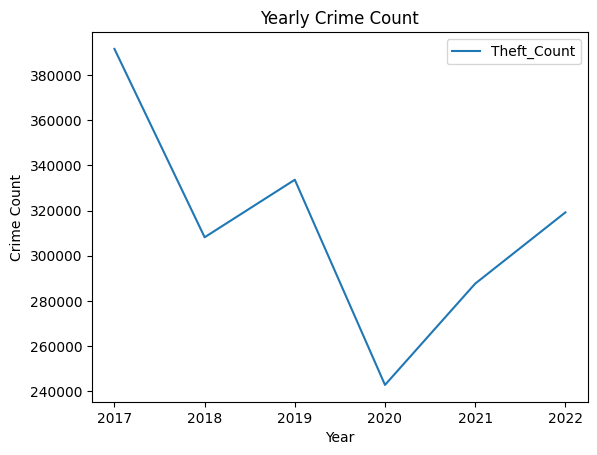

In [ ]:
import matplotlib.pyplot as plt

df.plot()
plt.xlabel('Year')
plt.ylabel('Crime Count')
plt.title('Yearly Crime Count')
plt.show()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Split the data into training and testing sets
train = df.iloc[:-1]
test = df.iloc[-1:]

# Fit the model
model = ARIMA(df['Theft_Count'], order=(1, 1, 1))  # Example order
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

forecast = model_fit.forecast(steps=1)

# Calculate accuracy metrics
mae = mean_absolute_error(test, forecast)
mse = mean_squared_error(test, forecast)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 0.07962314394535497
Mean Squared Error (MSE): 0.006339845051742718
Root Mean Squared Error (RMSE): 0.07962314394535497


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


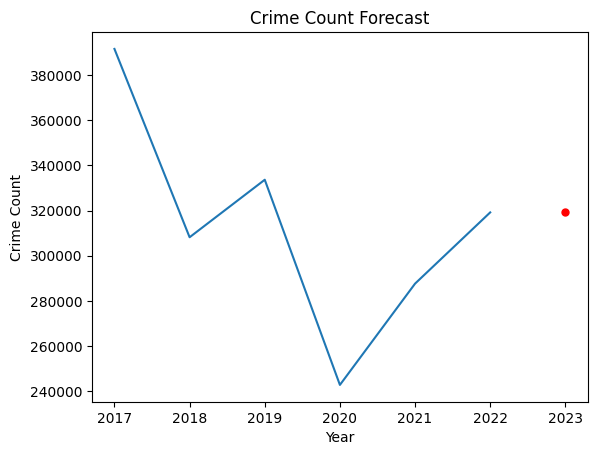

In [ ]:
plt.plot(df, label='Historical')
plt.plot([2023], forecast, marker='o', markersize=5, color='red', label='Forecast for 2023')
plt.xlabel('Year')
plt.ylabel('Crime Count')
plt.title('Crime Count Forecast')

plt.show()

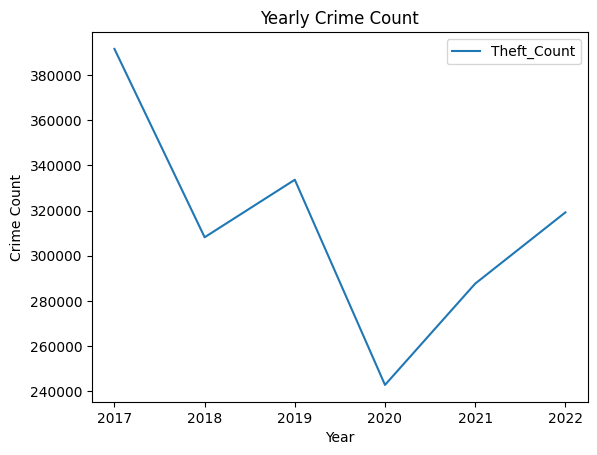

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using

KeyError: 0

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Sample data
data = {
    'Year': [2017, 2018, 2019, 2020, 2021, 2022],
    'Theft_Count': [391535, 308163, 333622, 242796, 287631, 319167]
}

df = pd.DataFrame(data)
df.set_index('Year', inplace=True)

# Visualize the data
df.plot()
plt.xlabel('Year')
plt.ylabel('Crime Count')
plt.title('Yearly Crime Count')
plt.show()

# Fit the ARIMA model
model = ARIMA(df['Theft_Count'], order=(1, 1, 1))  # Example order
model_fit = model.fit()

# Forecast for 2023
forecast = model_fit.forecast(steps=1)
print(f"Forecast for 2023: {forecast[0]}")

# Plot the forecast
plt.plot(df, label='Historical')
plt.plot([2023], forecast, marker='o', markersize=5, color='red', label='Forecast for 2023')
plt.xlabel('Year')
plt.ylabel('Crime Count')
plt.title('Crime Count Forecast')
plt.legend()
plt.show()

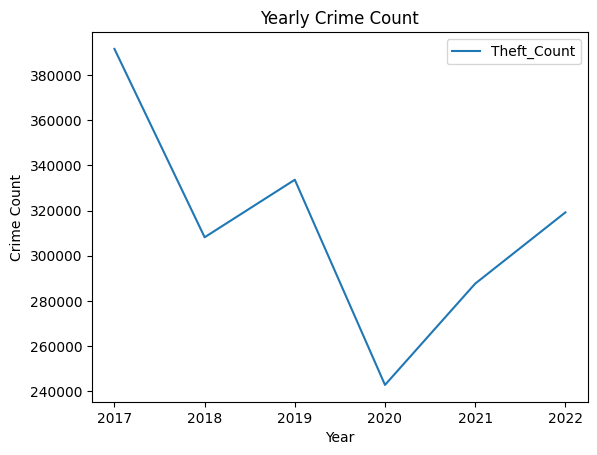

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using

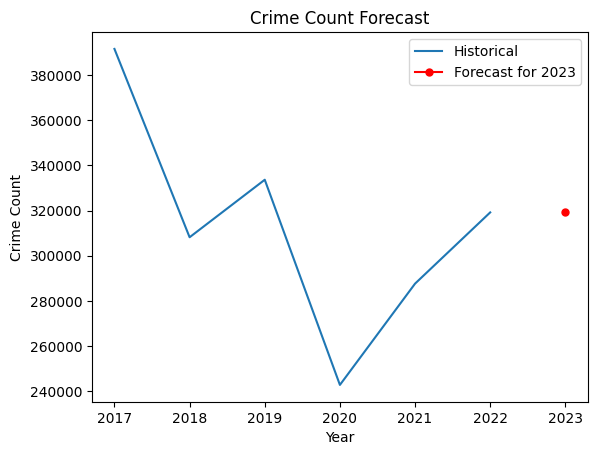

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Sample data
data = {
    'Year': [2017, 2018, 2019, 2020, 2021, 2022],
    'Theft_Count': [391535, 308163, 333622, 242796, 287631, 319167]
}


df = pd.DataFrame(data)
df.set_index('Year', inplace=True)

# Visualize the data
df.plot()
plt.xlabel('Year')
plt.ylabel('Crime Count')
plt.title('Yearly Crime Count')
plt.show()

# Fit the ARIMA model
model = ARIMA(df['Theft_Count'], order=(1, 1, 1))  # Example order
model_fit = model.fit()

# Forecast for 2023
forecast = model_fit.forecast(steps=1)
#print(f"Forecast for 2023: {forecast[0]}")

# Plot the forecast
plt.plot(df, label='Historical')
plt.plot([2023], forecast, marker='o', markersize=5, color='red', label='Forecast for 2023')
plt.xlabel('Year')
plt.ylabel('Crime Count')
plt.title('Crime Count Forecast')
plt.legend()
plt.show()

In [ ]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 17.1 MB/s eta 0:00:00


In [ ]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

df = pd.read_csv('/content/Forecast_Data2.csv', names=['Year'], header=0)

model = pm.auto_arima(df.Year, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0,
                      D=0,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=38699.451, Time=2.32 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=39467.967, Time=0.17 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=38999.777, Time=0.18 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=39136.635, Time=0.60 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=38671.835, Time=4.63 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=38941.139, Time=0.25 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=38666.417, Time=2.99 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=38878.554, Time=0.33 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=38674.512, Time=1.72 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=38670.673, Time=2.14 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=38711.888, Time=2.00 sec

Best model:  ARIMA(3,0,1)(0,0,0)[0]          
Total fit time: 17.417 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:      

In [ ]:
# Forecast
n_periods = 24
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(df.Theft), len(df.Year)+n_periods)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

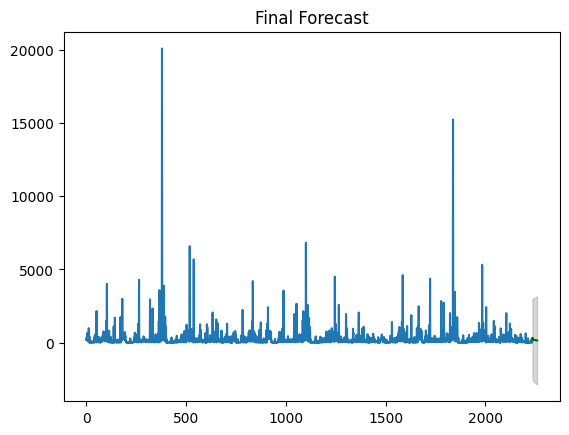

In [ ]:
# Plot
df = pd.read_csv("/content/Forecast_Data2.csv")
plt.plot(df.Theft)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index,
                 lower_series,
                 upper_series,
                 color='k', alpha=.15)

plt.title("Final Forecast")
plt.show()

In [ ]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = df.Theft[:85]
test = df.Theft[85:]

In [ ]:
pip install pandas numpy statsmodels scikit-learn matplotlib


In [ ]:
import statsmodels

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


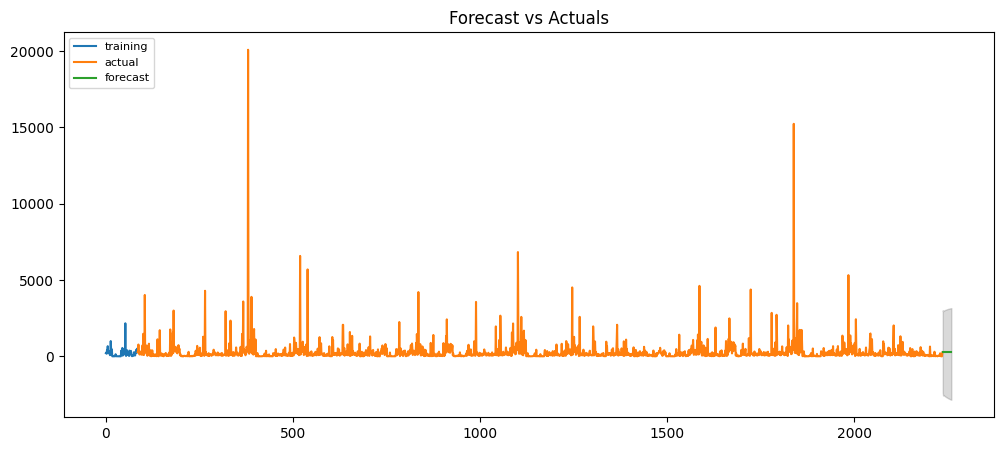

In [ ]:
# Build Model
#model = ARIMA(train, order=(3, 2, 1))
model = statsmodels.tsa.arima.model.ARIMA(train, order=(1, 1, 1))
fitted = model.fit()

# Forecast
fc, se, conf = fitted.forecast(3, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series,
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()